## Lecture 7 : Data Visualization (Part 1)

This is the first of a two part lecture examining data visualization.  In this part, we focus on line, scatter, and bar plots. These can be very helpfuly when trying to understand your data and when communicating properties of your data. 


The standard imports we use for most lectures.

In [1]:
from datascience import *
import numpy as np

These are the new commands we use to setup the plotting tools.  You don't need to understand these but you need to run them at the beginning of your notebook:

In [2]:
# This command enables plots to appear directly in your notebook.
%matplotlib inline
# This includes the powerful matplotlib plotting library
import matplotlib.pyplot as plots
# This sets the style to mirror that of the popular fivethirtyeight blog ...
plots.style.use('fivethirtyeight')

<br><br><br><br><br><br>

---

# Preparing the Census Data

In this lecture we continue with the census data.  However, before we proceed we will do some initial cleanup.

In [3]:
full = Table.read_table('nc-est2019-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


**Exercise:** Simplify the table to contain just the `"SEX"`, `"AGE"`, and the population estimates for `"2014"` and `"2019"`. Remove the aggregate data stored in `"AGE"=999"` (see previous lecture for details). Save the result in a table called `data`.

In [4]:
data = (
    full
        .select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
        .relabeled('POPESTIMATE2014', '2014')
        .relabeled('POPESTIMATE2019', '2019')
        .where('AGE', are.not_equal_to(999)) # remove aggregates   
)
data

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


<details><summary>Click to Expand Solution</summary>
    

```python
data = (
    full
        .select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
        .relabeled('POPESTIMATE2014', '2014')
        .relabeled('POPESTIMATE2019', '2019')
        .where('AGE', are.not_equal_to(999)) # remove aggregates   
)
data
```
    
Notice in this solution we use an extra parenthesis:

```python
data = (
    # I put my code 
    # on multiple lines here
)
```
    
This allows me to break the expression over multiple lines.  

</details>

<br><br><br><br><br><br>

--- 

# Line Plots 

Line plots are used to visualize the relationship between two numerical variables where we believe one is a function of the other.  There is single x (horizontal axis) value and one or more y (vertical axis) values.  

**Exercise:** Plot the relationship between age and the *total population* at that age in 2019.

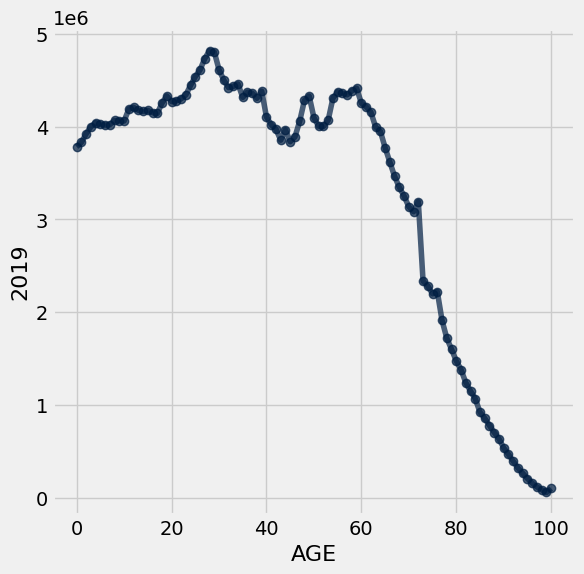

In [10]:
data.where("SEX", 0).plot('AGE', '2019', marker="o")

<details><summary>Click to Expand Solution</summary>
    

```python
data.where("SEX", 0).plot('AGE', '2019')
```

</details>

<br><br><br><br><br><br>

**Exercise:** What happens when I plot something like:

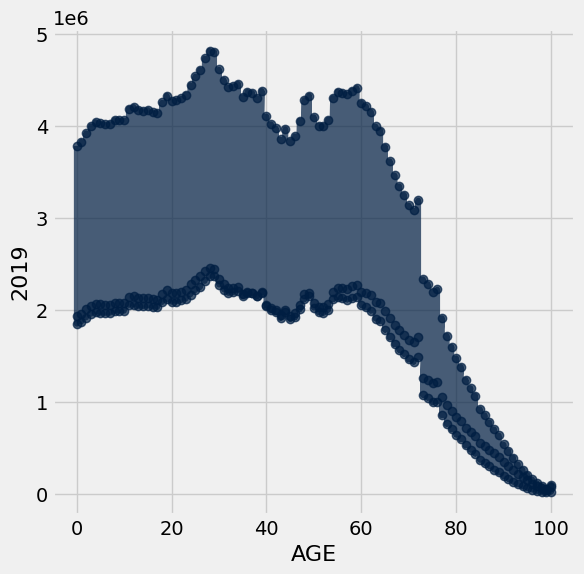

In [11]:
data.plot("AGE", "2019", marker="o")

What happened?

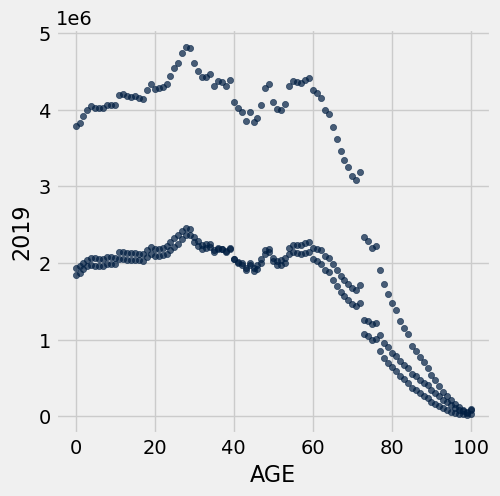

In [7]:
data.scatter("AGE", "2019")

<br><br><br><br><br><br>


**Exercise:** How does the population change between `2014` and `2019`? Plot both years

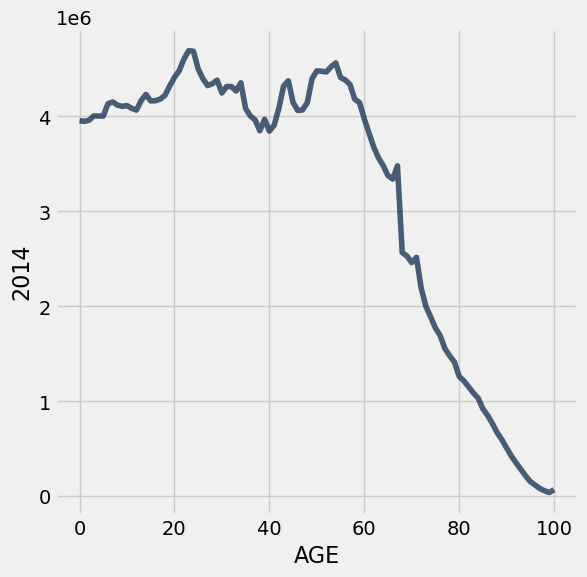

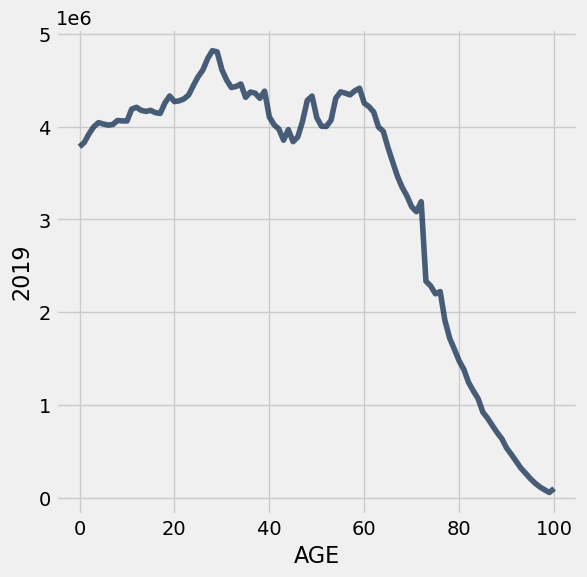

In [8]:
data.where("SEX", 0).plot('AGE', '2014')
data.where("SEX", 0).plot('AGE', '2019')

<br><br><br><br><br><br>

**Exercise:** It is very difficult to relate both years by looking at two separate plots.  Merge both plots into a single plot. (Try making it interactive by replacing `plot` with `iplot`)

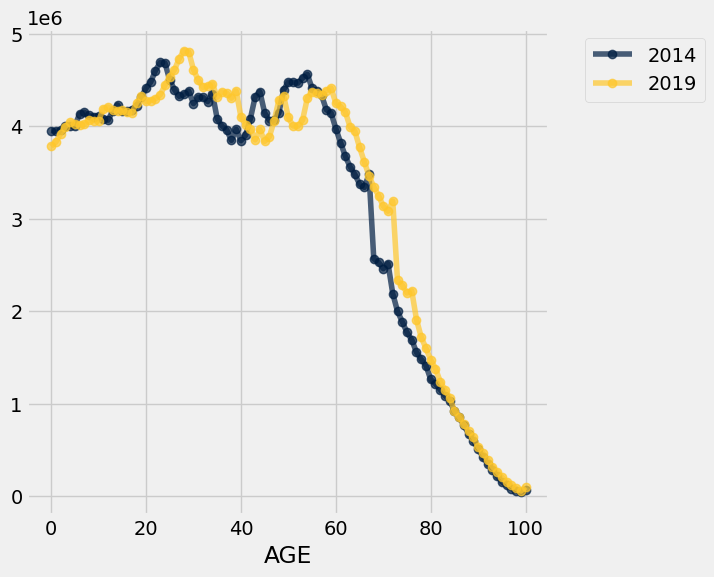

In [12]:
(
    data
    .where("SEX", 0)
    .plot("AGE", make_array('2014', '2019'), marker="o")
)

What do we observe?

<br><br><br><br><br><br>

---

## Males vs Females (Optional, Skipped in Lecture)

How does the proportion of males and females change with age?

**Exercise:** Create a table containing three columns `"Age"`, `"Males"`, and `"Females"` with the corresponding population counts for 2019.

In [14]:
pop_2019 = Table().with_columns(
    "Age", data.where("SEX", 0).column("AGE"),
    "Males", data.where("SEX", 1).column("2019"),
    "Females", data.where("SEX", 2).column("2019")
)
pop_2019

Age,Males,Females
0,1935117,1847935
1,1958585,1871014
2,2005544,1916500
3,2043010,1955655
4,2066951,1976372
5,2061200,1967081
6,2052956,1964271
7,2055735,1966584
8,2079723,1986471
9,2073148,1988726


**Exercise:** Plot the number of males and females against their age as two separate lines.

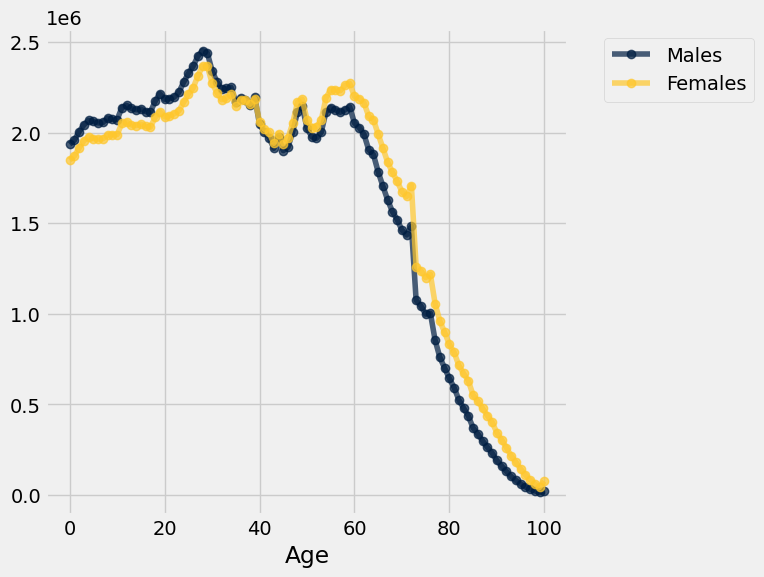

In [15]:
pop_2019.plot("Age", marker="o")

**Exercise:** Add a column containing the proportion of females and plot that against age.

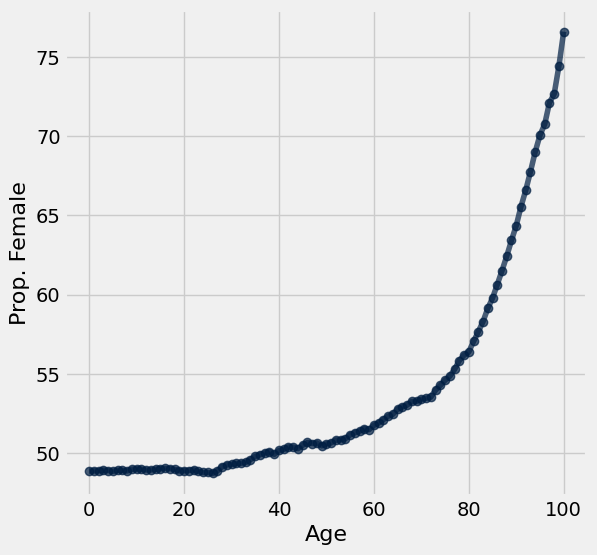

In [17]:
top_pop_2019 = pop_2019.column("Females") + pop_2019.column("Males")
pop_2019 = pop_2019.with_column("Prop. Female", 
                                pop_2019.column("Females") / top_pop_2019 * 100)
pop_2019.plot("Age", "Prop. Female", marker="o")
#plots.ylim(0, 100);  # Optional for Data 8 --- Should we even do this?...

Notice there is a large change in the proprotion of females at older ages. You can't see this easily in the earlier visualization.  This is why we will often construct multiple visualizations with additional transformations to help reveal potentially interesting patterns in our data.

<br><br><br><br><br><br>

--- 

# Scatter Plots 

Scatter plots are also used to visualize the relationship between numerical data.  However, unlike line plots they can be more flexible and do not imply a functional relationship between data. 

Here we will examine the `"actors.csv"` table which contains 50 rows, corresponding to the 50 top grossing actors. The table is already sorted by `"Total Gross"`, so it is easy to see that *Harrison Ford* is the highest grossing actor.

In [13]:
# Actors and their highest grossing movies
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


<br><br><br><br><br><br>

**Exercise:** Construct a scatter plot examining the relationship between `"Number of Movies"` and `"Average per Movie"`. (Try using `iscatter` instead.)

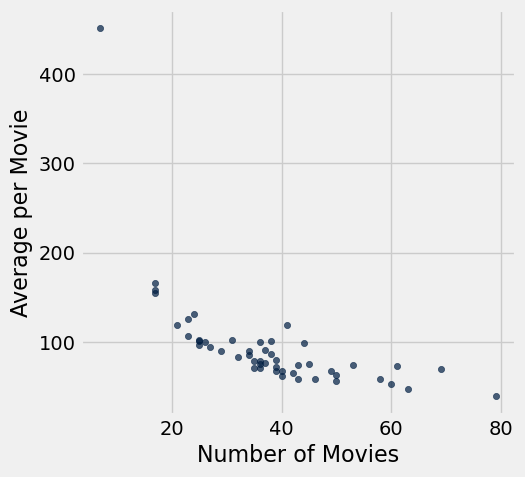

In [14]:
actors.scatter('Number of Movies', 'Average per Movie')

Why not use a line plot?

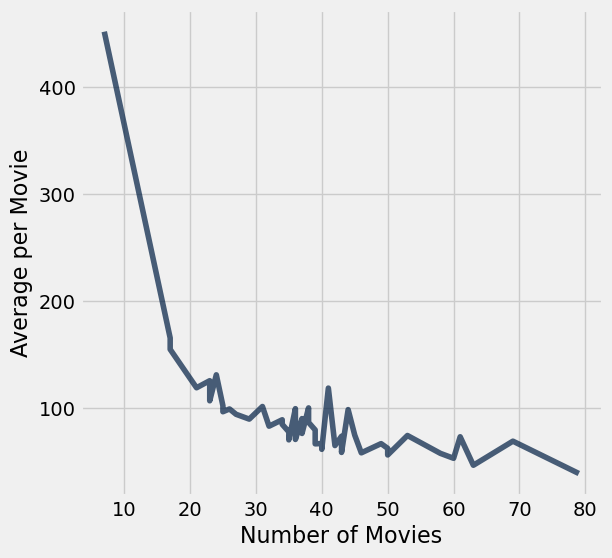

In [15]:
actors.plot('Number of Movies', 'Average per Movie')

Who is the outlier in the top left?

In [16]:
actors.where('Average per Movie', are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


<br><br><br><br><br><br>

---

<center> Return to Slides </center>

---



<br><br><br><br><br><br>


---

# Bar Charts 

Bar charts are used to visualize the relationship between numerical attributes and categorical attributes.

Here we examine the top 200 highest grossing movies of all time (as of 2017). 

In [19]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


**Exercise:** Based on this data, what is the relationship between the studios and their total revenue? Construct a bar plot showing the total `Gross (Adjusted)` income for each studio.

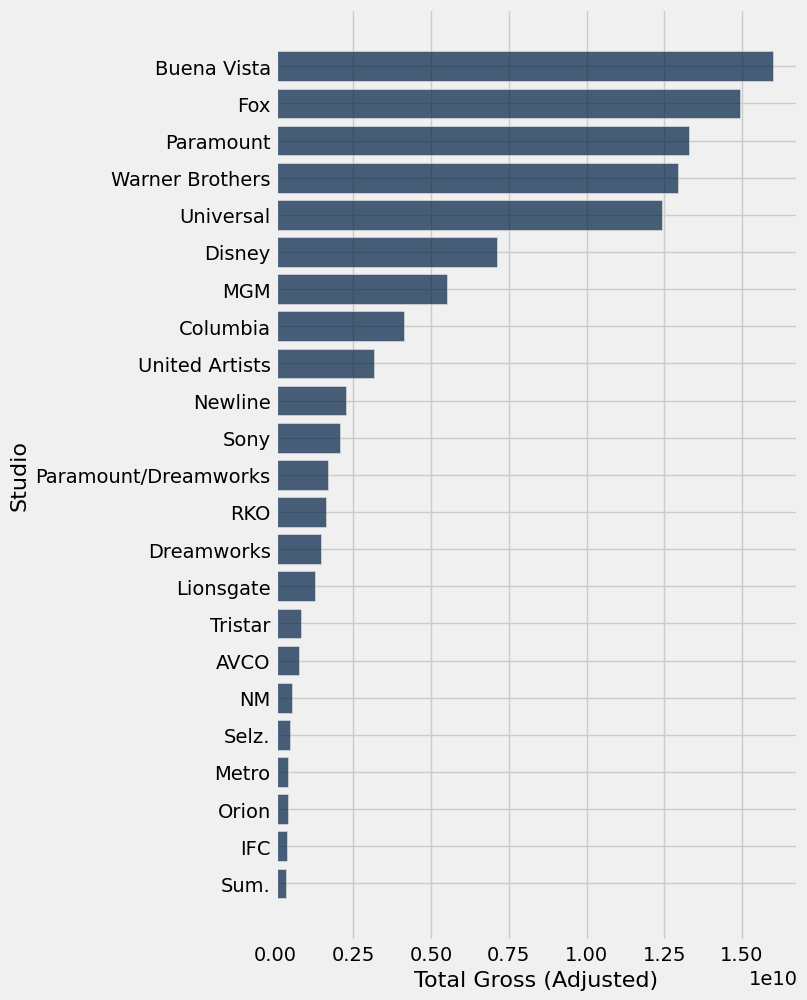

In [20]:
(
    top_movies
        .select("Studio", "Gross (Adjusted)")
        .group("Studio",collect=sum)
        .relabel("Gross (Adjusted) sum", "Total Gross (Adjusted)")
        .sort("Total Gross (Adjusted)", descending=True)
        .barh("Studio")
)

Dig deeper into the top studio.

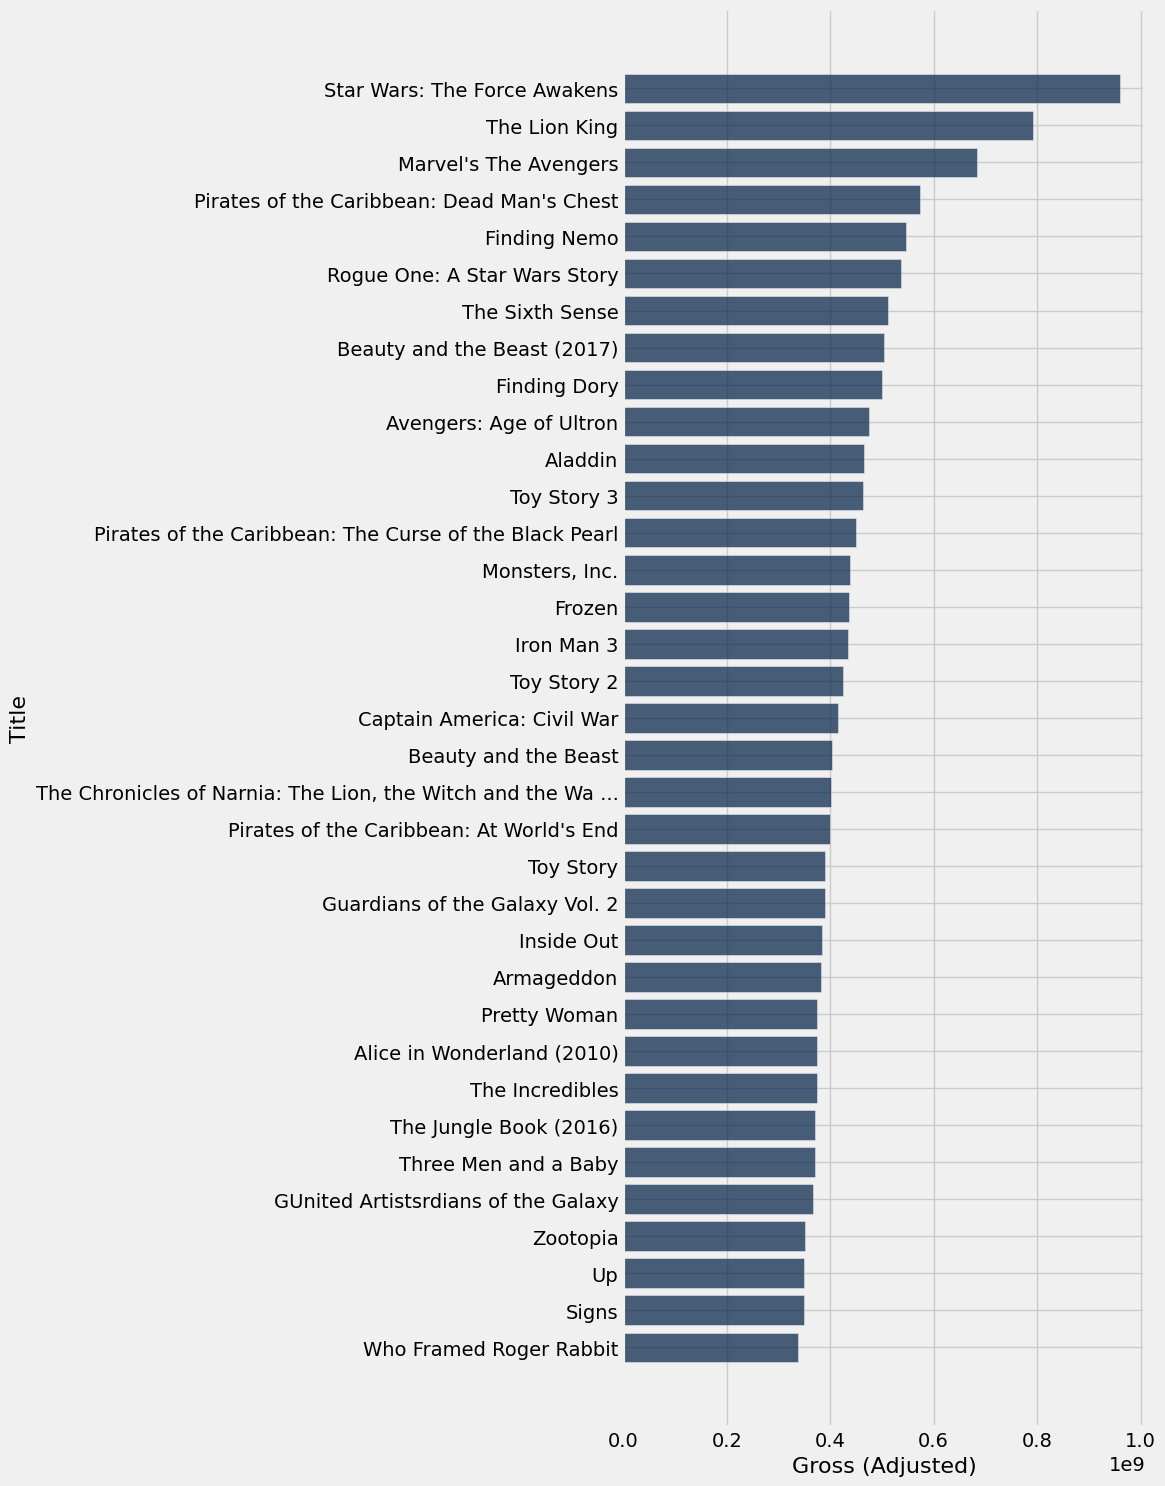

In [21]:
(top_movies
 .where("Studio", "Buena Vista")
 .barh("Title", "Gross (Adjusted)")
)

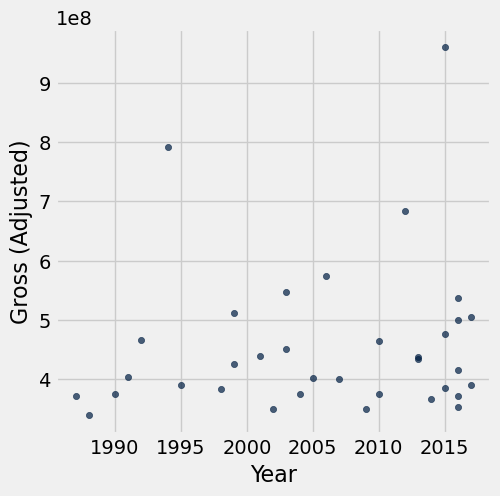

In [20]:
(top_movies
 .where("Studio", "Buena Vista")
 .scatter("Year", "Gross (Adjusted)")
)